In [9]:
import neuro_op as nop
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.stats as st

In [12]:
N_beliefs = 1000

agents, G, beliefs, world, N_events, t_end = nop.run_model(
    N_agents=100,
    N_neighbours=3,
    N_beliefs=N_beliefs,
    belief_min=-50,
    belief_max=50,
    log_priors=np.zeros(N_beliefs),
    likelihood=st.norm(loc=0, scale=5),
    world_dist=st.norm(loc=0, scale=5),
    h=1,
    r=1,
    t_max=10000,
)

print(f"Number of events: {N_events}")

Number of events: 20036


In [13]:
plt.rcParams.update({"font.size": 25})

Text(0, 0.5, '$p(\\mu|x_i)$')

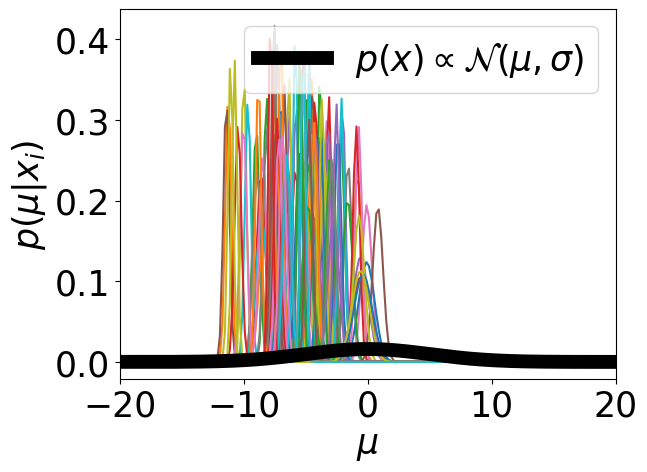

In [14]:
for i in range(len(agents)):
    plt.plot(agents[0].beliefs, nop.logpdf_to_pdf(agents[i].log_probs))
    plt.xlim([-20, 20])
plt.plot(
    beliefs,
    nop.logpdf_to_pdf(world.log_probs),
    color="black",
    linewidth=10,
    label="$p(x) \propto \mathcal{N}(\mu,\sigma)$",
)
plt.legend()
plt.xlabel("$\mu$")
plt.ylabel("$p(\mu|x_i)$")

(array([0.00054509, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00054509, 0.        , 0.        ,
        0.        , 0.        , 0.00054509, 0.00109017, 0.00163526,
        0.00163526, 0.00218034, 0.00054509, 0.00054509, 0.0038156 ,
        0.00545086, 0.0076312 , 0.00926645, 0.00599594, 0.0076312 ,
        0.00926645, 0.00981154, 0.01362714, 0.01962308, 0.01035662,
        0.02343868, 0.01471731, 0.02071325, 0.02888953, 0.03434039,
        0.04033633, 0.04796752, 0.05014787, 0.04633227, 0.02452885,
        0.05123804, 0.05777906, 0.05832415, 0.05559872, 0.06432009,
        0.06813569, 0.07304146, 0.0714062 , 0.07685706, 0.0452421 ,
        0.09320962, 0.07631197, 0.09484488, 0.08394317, 0.08176283,
        0.08503334, 0.0675906 , 0.07249637, 0.06813569, 0.03106987,
        0.08121774, 0.07413163, 0.07631197, 0.06704552, 0.05341838,
        0.05832415, 0.05069295, 0.03924616, 0.03979124, 0.01689765,
        0.03706581, 0.0299797 , 0.02452885, 0.02

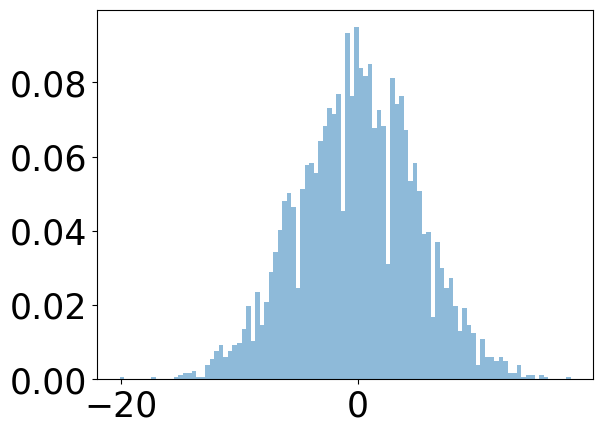

In [15]:
plt.hist(world.protocol, bins=100, density=True, alpha=0.5, label="world")

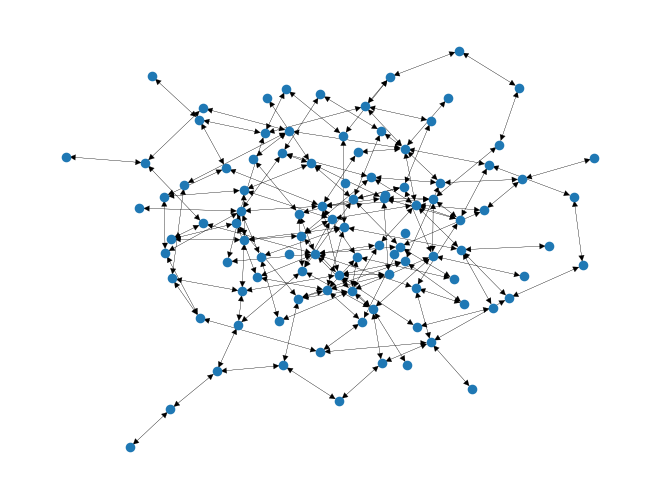

In [16]:
foo = nx.draw_kamada_kawai(G, with_labels=False, node_size=35, width=0.15)
plt.savefig("network.png", dpi=300)

In [17]:
agent= agents[24]
#plt.plot(agent.beliefs, logpdf_to_pdf(agent.log_probs))
#plt.xlim([-20,20])

def surprise(probs):
    """Calculate surprise given some info piece x for i
    S = -ln(p(x_i))"""
    